In [119]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn.linear_model as skl_lm
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import confusion_matrix, classification_report, precision_score, r2_score, mean_squared_error
from sklearn import preprocessing
from sklearn import neighbors
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler, MinMaxScaler, normalize, PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.decomposition import PCA
from numpy import mean, std, absolute, arange

import statsmodels.api as sm
import statsmodels.formula.api as smf

import ISLP
from ISLP.models import (ModelSpec,
                         summarize,
                         Column,
                         Feature,
                         build_columns, poly)



In [80]:
bike = pd.read_csv("Bike Sharing Dataset.csv", usecols = [2,3,4,5,6,7,8,9,10,11,12,13,14,15,16])
bike.info()
bike.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      17379 non-null  object 
 1   yr          17379 non-null  int64  
 2   mnth        17379 non-null  object 
 3   hr          17379 non-null  int64  
 4   holiday     17379 non-null  object 
 5   weekday     17379 non-null  object 
 6   workingday  17379 non-null  object 
 7   weathersit  17379 non-null  object 
 8   temp        17379 non-null  float64
 9   atemp       17379 non-null  float64
 10  hum         17379 non-null  float64
 11  windspeed   17379 non-null  float64
 12  casual      17379 non-null  int64  
 13  registered  17379 non-null  int64  
 14  cnt         17379 non-null  int64  
dtypes: float64(4), int64(5), object(6)
memory usage: 2.0+ MB


,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,spring,0,january,0,no,saturday,no,clear,0.24,0.2879,0.81,0.0,3,13,16
1,spring,0,january,1,no,saturday,no,clear,0.22,0.2727,0.80,0.0,8,32,40
2,spring,0,january,2,no,saturday,no,clear,0.22,0.2727,0.80,0.0,5,27,32
3,spring,0,january,3,no,saturday,no,clear,0.24,0.2879,0.75,0.0,3,10,13
4,spring,0,january,4,no,saturday,no,clear,0.24,0.2879,0.75,0.0,0,1,1


In [81]:
bike.info()
print(bike.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      17379 non-null  object 
 1   yr          17379 non-null  int64  
 2   mnth        17379 non-null  object 
 3   hr          17379 non-null  int64  
 4   holiday     17379 non-null  object 
 5   weekday     17379 non-null  object 
 6   workingday  17379 non-null  object 
 7   weathersit  17379 non-null  object 
 8   temp        17379 non-null  float64
 9   atemp       17379 non-null  float64
 10  hum         17379 non-null  float64
 11  windspeed   17379 non-null  float64
 12  casual      17379 non-null  int64  
 13  registered  17379 non-null  int64  
 14  cnt         17379 non-null  int64  
dtypes: float64(4), int64(5), object(6)
memory usage: 2.0+ MB
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp

#### OLS Regression

In [82]:
bike['workingday'] = bike.workingday.factorize()[0]
bike['weathersit'] = bike.weathersit.factorize()[0]
bike['season'] = bike.season.factorize()[0]
bike['mnth'] = bike.mnth.factorize()[0]
bike['weekday'] = bike.weekday.factorize()[0]
bike['holiday'] = bike.holiday.factorize()[0]


est = smf.ols('cnt ~ hr + workingday + temp', bike).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.281
Model:                            OLS   Adj. R-squared:                  0.281
Method:                 Least Squares   F-statistic:                     2259.
Date:                Wed, 29 Nov 2023   Prob (F-statistic):               0.00
Time:                        16:13:20   Log-Likelihood:            -1.1218e+05
No. Observations:               17379   AIC:                         2.244e+05
Df Residuals:                   17375   BIC:                         2.244e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -84.6416      3.906    -21.669      0.000     -92.298     -76.985
hr             9.0494      0.170     53.100      0.000       8.715       9.383
workingday     3.7938      2.512      1.511      0.131      -1.129       8.717
temp         336.0729      6.129     54.834      0.000     324.060     348.086
==============================================================================
Omnibus:                     3951.373   Durbin-Watson:                   0.484
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             8470.361
Skew:                           1.324   Prob(JB):                         0.00
Kurtosis:                       5.164   Cond. No.                         78.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Cross-Validation

In [83]:
x = bike[['windspeed','hr','temp','season','weekday','workingday','weathersit']]
y = bike['cnt']

cv = KFold(n_splits=50, shuffle=True)

model = LinearRegression()

scores = cross_val_score(model, x, y, scoring='r2', cv=cv, n_jobs=-1)
mean(absolute(scores))

0.29951686996646726

In [84]:
x = bike[['windspeed','hr','temp','season','weekday','holiday', 'workingday','weathersit', 'hum', 'yr']]
y = bike['cnt']

cv = KFold(n_splits=50, shuffle=True)

model = LinearRegression()

scores = cross_val_score(model, x, y, scoring='r2', cv=cv, n_jobs=-1)
mean(absolute(scores))

0.3844726851842139

In [85]:
bike_df_final = pd.read_csv("Bike Sharing Dataset.csv")
X = bike_df_final.drop(['instant', 'cnt', 'registered', 'casual', 'dteday'], axis=1)
X.head()
X_encoded = pd.get_dummies(X)
X_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 37 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   yr                     17379 non-null  int64  
 1   hr                     17379 non-null  int64  
 2   temp                   17379 non-null  float64
 3   atemp                  17379 non-null  float64
 4   hum                    17379 non-null  float64
 5   windspeed              17379 non-null  float64
 6   season_autumn          17379 non-null  uint8  
 7   season_spring          17379 non-null  uint8  
 8   season_summer          17379 non-null  uint8  
 9   season_winter          17379 non-null  uint8  
 10  mnth_april             17379 non-null  uint8  
 11  mnth_august            17379 non-null  uint8  
 12  mnth_december          17379 non-null  uint8  
 13  mnth_february          17379 non-null  uint8  
 14  mnth_january           17379 non-null  uint8  
 15  mn

#### Linear Regression

In [86]:
LR = LinearRegression()
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

LR.fit(X_train, y_train)

y_pred = LR.predict(X_test)
print(f"R2 Score: {r2_score(y_test, y_pred)}")

print(f"Mean squared error is {mean_squared_error(y_test, y_pred)}")

print(f"Root mean squared is {np.sqrt(mean_squared_error(y_test, y_pred))}")

R2 Score: 0.4085837949485135
Mean squared error is 18727.437404001554
Root mean squared is 136.8482276246264


#### PCA

X_train_pca shape: (13903, 20)
X_test_pca shape: (3476, 20)
X train shape:  (13903, 37)
X test shape:  (3476, 37)
Explained Variance Ratio: [0.10879597 0.08589582 0.0661669  0.06221031 0.05802631 0.05466345
 0.03613398 0.03430276 0.03212476 0.03168696 0.03150665 0.03134872
 0.0310166  0.02998625 0.02954614 0.02941608 0.02925727 0.02894849
 0.02887805 0.02858233]
Cumulative Variance Ratio: [0.10879597 0.19469179 0.26085869 0.323069   0.38109531 0.43575876
 0.47189274 0.50619549 0.53832025 0.5700072  0.60151385 0.63286257
 0.66387917 0.69386542 0.72341157 0.75282765 0.78208492 0.81103341
 0.83991146 0.86849379]


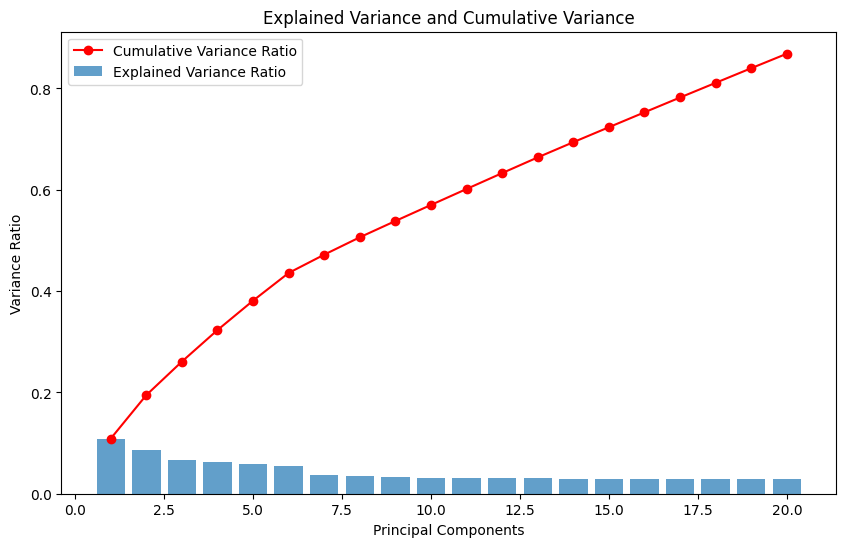

Mean Squeared Error: 20079.697722628276
R2 Score:  0.3658791446201646


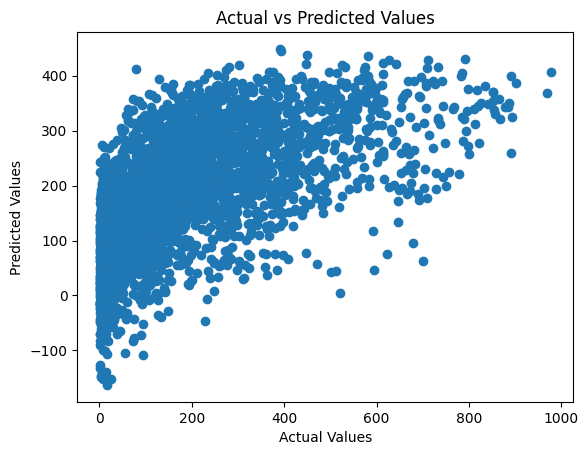

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [87]:
mms = MinMaxScaler()
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

pca = PCA(n_components=20)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

print("X_train_pca shape:", X_train_pca.shape)
print("X_test_pca shape:", X_test_pca.shape)
print("X train shape: ", X_train.shape)
print("X test shape: ", X_test.shape)

explained_variance = pca.explained_variance_ratio_

print("Explained Variance Ratio:", explained_variance)

cumulative_variance = explained_variance.cumsum()
print("Cumulative Variance Ratio:", cumulative_variance)

plt.figure(figsize=(10, 6))
plt.bar(range(1, len(explained_variance) + 1), explained_variance, label='Explained Variance Ratio', alpha=0.7)
plt.plot(range(1, len(explained_variance) + 1), cumulative_variance, label='Cumulative Variance Ratio', marker='o', color='r')
plt.xlabel('Principal Components')
plt.ylabel('Variance Ratio')
plt.legend()
plt.title('Explained Variance and Cumulative Variance')
plt.show()


# Linear regression after PCA

model = LinearRegression()

model.fit(X_train_pca, y_train)

y_pred = model.predict(X_test_pca)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squeared Error: {mse}')
print(f'R2 Score: ', r2)

plt.scatter(y_test, y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()

print(type(X_train))
print(type(X_test))

#### Forward Stepwise Selection

In [113]:
est = LinearRegression()
selector = SequentialFeatureSelector(est, direction='forward', scoring='neg_mean_squared_error', n_features_to_select=10, cv=10)
selector = selector.fit(X_train, y_train)

selected_features = np.where(selector.support_)[0]
print("Selected features:", selected_features)

fwd_model = LinearRegression().fit(X_train[:, selected_features], y_train)

y_pred = fwd_model.predict(X_test[:, selected_features])
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Forward MSE:", mse)
print("Forward R2: ", r2)

Selected features: [ 0  5  6  8 10 11 15 16 18 19]
Forward MSE: 20525.146649242597
Forward R2:  0.3518117787526803


#### Backward Stepwise Selection

In [114]:
est = LinearRegression()
selector = SequentialFeatureSelector(est, direction='backward', scoring='neg_mean_squared_error', n_features_to_select=10, cv=10)
selector = selector.fit(X_train, y_train)

selected_features = np.where(selector.support_)[0]
print("Selected features:", selected_features)

fwd_model = LinearRegression().fit(X_train[:, selected_features], y_train)

y_pred = fwd_model.predict(X_test[:, selected_features])
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Backward MSE:", mse)
print("Backward R2: ", r2)

Selected features: [ 0  1  2  4  6  7 12 20 21 35]
Backward MSE: 19051.387598155867
Backward R2:  0.39835338326327685


In [123]:
bike_df_final = pd.read_csv('BikeSharingDatasetFinal.csv', usecols=[3, 5, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24])

#### Polynomial

In [124]:

y_poly1 = bike_df_final['cnt']


x_poly1 = ModelSpec([poly('hr', degree=2),
                     poly('workingday_yes', degree=2),
                     poly('temp', degree=2),
                     'workingday_yes', 
                     'temp',
                     'hr'
                      ]).fit_transform(bike_df_final)

poly1model = sm.OLS(y_poly1, x_poly1)
results_poly1 = poly1model.fit()
summarize(results_poly1)

print(results_poly1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.404
Model:                            OLS   Adj. R-squared:                  0.404
Method:                 Least Squares   F-statistic:                 3.863e+04
Date:                Wed, 29 Nov 2023   Prob (F-statistic):               0.00
Time:                        16:54:24   Log-Likelihood:            -1.8163e+06
No. Observations:              284701   AIC:                         3.633e+06
Df Residuals:                  284695   BIC:                         3.633e+06
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
interc

In [125]:
# poly model - 2 
# cnt as dependent .
# 'windspeed','hr','temp','season_cat','weekday_cat','workingday_yes', 'workingday_no', 'weathersit_cat'
# use sklearn PolynomialFeatures.



x_poly2 = bike_df_final[['windspeed', 'hr', 'temp', 'season_cat', 'weekday_cat', 'workingday_yes', 'workingday_no', 'weathersit_cat']]
y_poly2 = bike_df_final['cnt']

poly2features = PolynomialFeatures(degree=2)
xfit_poly2 = poly2features.fit_transform(x_poly2)

poly2model = LinearRegression()
poly2model.fit(xfit_poly2, y_poly2)


cv = KFold(n_splits=50, shuffle=True)

poly2scores = cross_val_score(poly2model, x_poly2, y_poly2, scoring='r2', cv=cv, n_jobs=-1)
print(mean(absolute(poly2scores)))

print("Intercept:  ",poly2model.intercept_)
print("Coefficient:  ", poly2model.coef_)
print("Score:  ", poly2model.score(xfit_poly2, y_poly2))

0.3107326976962676
Intercept:   -33.749486777658575
Coefficient:   [-8.42307958e-14 -4.92160462e+01  3.11748204e+01  1.29659716e+02
 -6.36670713e+01  6.14666831e+00 -1.74175205e+01 -1.74175205e+01
 -1.23571562e+02 -2.68686503e+02  6.51823568e+00  2.13606864e+02
  1.51741787e+01 -3.46219239e+00  4.14153315e+01  4.14153315e+01
 -2.56624847e+01 -1.52599702e+00  2.48599612e+01  8.69572979e-01
  3.99245497e-02 -1.00684098e+00 -1.00684098e+00 -5.09074249e-01
 -2.63443028e+02  4.59855713e+01 -4.24313894e+00  7.75412763e+01
  7.75412763e+01 -5.99872724e+00  1.41844654e+01 -8.39559369e-01
  5.77273283e+00  5.77273283e+00 -1.44602800e+00 -3.22190118e-01
 -1.84965854e+00 -1.84965854e+00 -1.70013735e+00 -1.74175205e+01
 -1.74175205e+01  5.56793850e-01 -1.74175205e+01  5.56793850e-01
  4.56663929e+01]
Score:   0.4685867301322998


In [126]:
# poly model - 3
# cnt as dependent .
# windspeed','hr','temp','season_cat','weekday_cat','workingday_yes', 'workingday_no', 'weathersit_cat', 'casual'
# use sklearn PolynomialFeatures.



x_poly3 = bike_df_final[['windspeed', 'hr', 'temp', 'season_cat', 'weekday_cat', 'workingday_yes', 'workingday_no', 'weathersit_cat', 'casual']]
y_poly3 = bike_df_final['cnt']


poly3features = PolynomialFeatures(degree=2)
xfit_poly3 = poly3features.fit_transform(x_poly3)

poly3model = LinearRegression()
poly3model.fit(xfit_poly3, y_poly3)


cv = KFold(n_splits=50, shuffle=True)

poly3scores = cross_val_score(poly3model, x_poly3, y_poly3, scoring='r2', cv=cv, n_jobs=-1)

print(mean(absolute(poly3scores)))

print("Intercept:  ",poly3model.intercept_)
print("Coefficient:  ", poly3model.coef_)
print("Score:  ", poly3model.score(xfit_poly3, y_poly3))

0.5868222964100793
Intercept:   -2.072328134498889
Coefficient:   [-4.15111676e-11  2.25118653e+01  1.46710651e+01  2.24921975e+02
 -5.49031766e+01  9.14500250e+00  4.98499310e+00  4.98499310e+00
 -5.66567722e+01  2.75488154e+00 -1.90385761e+02  5.25600787e+00
  2.31154963e+01 -8.72767131e+00  2.57619823e+00  1.22646357e+01
  1.22646357e+01 -6.13178251e+00 -2.91549426e-01 -5.62616564e-01
  1.11194353e+00  7.53178107e-01 -1.32774329e-01 -1.59706908e+00
 -1.59706908e+00 -1.08674531e-01  5.21096112e-02 -3.01162747e+02
  5.48259876e+00 -1.30471333e+01  5.67685557e+00  5.67685557e+00
  5.63794634e+00  3.64055830e-01  1.55341130e+01  6.03492815e-01
 -1.13027958e+00 -1.13027958e+00  1.25309486e+00 -1.50854508e-02
 -7.72196621e-01 -1.00533683e+01 -1.00533683e+01 -6.16656590e-01
  2.65229370e-01  4.98499310e+00  4.98499310e+00  7.27486186e-01
 -6.07411638e-01  4.98499310e+00  7.27486186e-01 -6.07411638e-01
  1.84480174e+01 -2.05560986e-02 -4.00877176e-03]
Score:   0.671349094125335
